# Objetivo

Treinar, testar e validar um modelo de clusterização.

# Bibliotecas

In [1]:
import pandas as pd
from sklearn import cluster
from sklearn import tree
import seaborn as sns
import matplotlib.pyplot as plt
from yellowbrick.cluster import KElbowVisualizer

# Lendo as tabelas

In [2]:
catalogo = "../data/processed/"

# Tabela de features
df_raw= pd.read_csv(f"{catalogo}tb_book_sellers.csv")

In [3]:
df_raw.info()
print(df_raw.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24547 entries, 0 to 24546
Columns: 214 entries, seller_id to recbruta_utilidades_domesticas_prop
dtypes: float64(141), int64(71), object(2)
memory usage: 40.1+ MB
(24547, 214)


In [4]:
df_raw.head()

,seller_id,data,qtd_agro_industria_e_comercio,qtd_alimentos,qtd_alimentos_bebidas,qtd_artes_e_artesanato,qtd_artigos_de_festas,qtd_artigos_de_natal,qtd_audio,qtd_automotivo,...,recbruta_pet_shop_prop,recbruta_portateis_casa_forno_e_cafe_prop,recbruta_portateis_cozinha_e_preparadores_de_alimentos_prop,recbruta_relogios_presentes_prop,recbruta_seguros_e_servicos_prop,recbruta_sinalizacao_e_seguranca_prop,recbruta_tablets_impressao_imagem_prop,recbruta_telefonia_prop,recbruta_telefonia_fixa_prop,recbruta_utilidades_domesticas_prop
0,0015a82c2db000af6aaaf3ae2ecb0532,2017-10-01,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0015a82c2db000af6aaaf3ae2ecb0532,2017-11-01,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0015a82c2db000af6aaaf3ae2ecb0532,2017-12-01,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0015a82c2db000af6aaaf3ae2ecb0532,2018-01-01,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,001cca7ae9ae17fb1caed9dfb1094831,2017-03-01,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# Treino

In [9]:
df_train = df_raw[df_raw['data'] == '2018-05-01']
print(f'Shape antes: {df_train.shape}')

features = [c for c in df_train.columns if c.startswith('recbruta_') and c.endswith('_prop')]

cols = ['data', 'seller_id'] + features

df_train = df_train[cols]

print(f'Shape depois: {df_train.shape}')

Shape antes: (1441, 214)
Shape depois: (1441, 72)


In [10]:
df_train.head()

,data,seller_id,recbruta_agro_industria_e_comercio_prop,recbruta_alimentos_prop,recbruta_alimentos_bebidas_prop,recbruta_artes_e_artesanato_prop,recbruta_artigos_de_festas_prop,recbruta_artigos_de_natal_prop,recbruta_audio_prop,recbruta_automotivo_prop,...,recbruta_pet_shop_prop,recbruta_portateis_casa_forno_e_cafe_prop,recbruta_portateis_cozinha_e_preparadores_de_alimentos_prop,recbruta_relogios_presentes_prop,recbruta_seguros_e_servicos_prop,recbruta_sinalizacao_e_seguranca_prop,recbruta_tablets_impressao_imagem_prop,recbruta_telefonia_prop,recbruta_telefonia_fixa_prop,recbruta_utilidades_domesticas_prop
18,2018-05-01,001cca7ae9ae17fb1caed9dfb1094831,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
31,2018-05-01,002100f778ceb8431b7a1020ff7ab48f,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
49,2018-05-01,004c9cd9d87a3c30c522c48c4fc07416,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
55,2018-05-01,00720abe85ba0859807595bbf045a33b,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
65,2018-05-01,00d8b143d12632bad99c0ad66ad52825,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Agglomerative Clustering

In [11]:
# Treino do modelo usando Agglomerative Clustering
model = cluster.AgglomerativeClustering(n_clusters=10)
model.fit(df_train[features]) # fit: ajuste do modelo a partir das features

,n_clusters,10
,metric,'euclidean'
,memory,None
,connectivity,None
,compute_full_tree,'auto'
,linkage,'ward'
,distance_threshold,None
,compute_distances,False


In [23]:
df = df_train[features].copy()
df['cluster_id'] = model.labels_
df_train['cluster_id'] = model.labels_

df_train[['seller_id', 'cluster_id']]

,seller_id,cluster_id
18,001cca7ae9ae17fb1caed9dfb1094831,0
31,002100f778ceb8431b7a1020ff7ab48f,3
49,004c9cd9d87a3c30c522c48c4fc07416,5
55,00720abe85ba0859807595bbf045a33b,9
65,00d8b143d12632bad99c0ad66ad52825,0
...,...,...
24479,ffad1e7127fb622cb64a900751590acd,3
24487,ffc470761de7d0232558ba5e786e57b7,0
24507,ffdd9f82b9a447f6f8d4b91554cc7dd3,9
24521,ffeee66ac5d5a62fe688b9d26f83f534,0


In [25]:
df_train['cluster_id'].value_counts()

cluster_id
0    639
1    155
2    143
3     87
9     86
7     84
6     82
5     72
4     52
8     41
Name: count, dtype: int64

In [26]:
# Trasnforma as features de proporção em lista

df_cluster_mean = (
    df
    .groupby('cluster_id')
    .agg({col: 'mean' for col in features})
)

df_cluster_mean

,recbruta_agro_industria_e_comercio_prop,recbruta_alimentos_prop,recbruta_alimentos_bebidas_prop,recbruta_artes_e_artesanato_prop,recbruta_artigos_de_festas_prop,recbruta_artigos_de_natal_prop,recbruta_audio_prop,recbruta_automotivo_prop,recbruta_bebes_prop,recbruta_bebidas_prop,...,recbruta_pet_shop_prop,recbruta_portateis_casa_forno_e_cafe_prop,recbruta_portateis_cozinha_e_preparadores_de_alimentos_prop,recbruta_relogios_presentes_prop,recbruta_seguros_e_servicos_prop,recbruta_sinalizacao_e_seguranca_prop,recbruta_tablets_impressao_imagem_prop,recbruta_telefonia_prop,recbruta_telefonia_fixa_prop,recbruta_utilidades_domesticas_prop
cluster_id,,,,,,,,,,,,,,,,,,,,,
0,0.004664,0.006209,0.011588,0.003688,0.003117,0.007346,0.003189,0.009022,0.073386,0.012059,...,0.058556,0.002258,0.0,0.047159,0.0,0.011417,0.000871,0.046792,0.006598,0.033960
1,0.000000,0.000989,0.001311,0.000912,0.000000,0.000000,0.000689,0.007445,0.003504,0.003272,...,0.003029,0.000374,0.0,0.002460,0.0,0.001871,0.000000,0.001651,0.001507,0.009687
2,0.000000,0.001214,0.000000,0.000000,0.000000,0.000000,0.000000,0.004213,0.009363,0.000000,...,0.002962,0.000053,0.0,0.002392,0.0,0.000000,0.000000,0.000348,0.000000,0.005818
3,0.000038,0.000015,0.002693,0.003204,0.000000,0.000000,0.000000,0.006039,0.006169,0.000000,...,0.002897,0.000000,0.0,0.001414,0.0,0.000000,0.000000,0.000031,0.000000,0.030301
4,0.000000,0.000000,0.000000,0.000041,0.001895,0.000000,0.000000,0.005104,0.040226,0.000000,...,0.000000,0.000000,0.0,0.000778,0.0,0.000000,0.000000,0.014245,0.000000,0.003265
5,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000527,0.005988,0.000000,...,0.000039,0.000000,0.0,0.000231,0.0,0.000000,0.000000,0.000000,0.000000,0.005032
6,0.000742,0.000000,0.000000,0.000528,0.000000,0.000000,0.002553,0.002701,0.000150,0.000000,...,0.001311,0.000000,0.0,0.000030,0.0,0.000147,0.000422,0.008517,0.003083,0.000921
7,0.000000,0.000000,0.000000,0.000138,0.000000,0.001204,0.000000,0.964155,0.000601,0.004560,...,0.002061,0.000000,0.0,0.002568,0.0,0.000000,0.000000,0.000000,0.000000,0.001968
8,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000940,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.005618,0.000000,0.000636


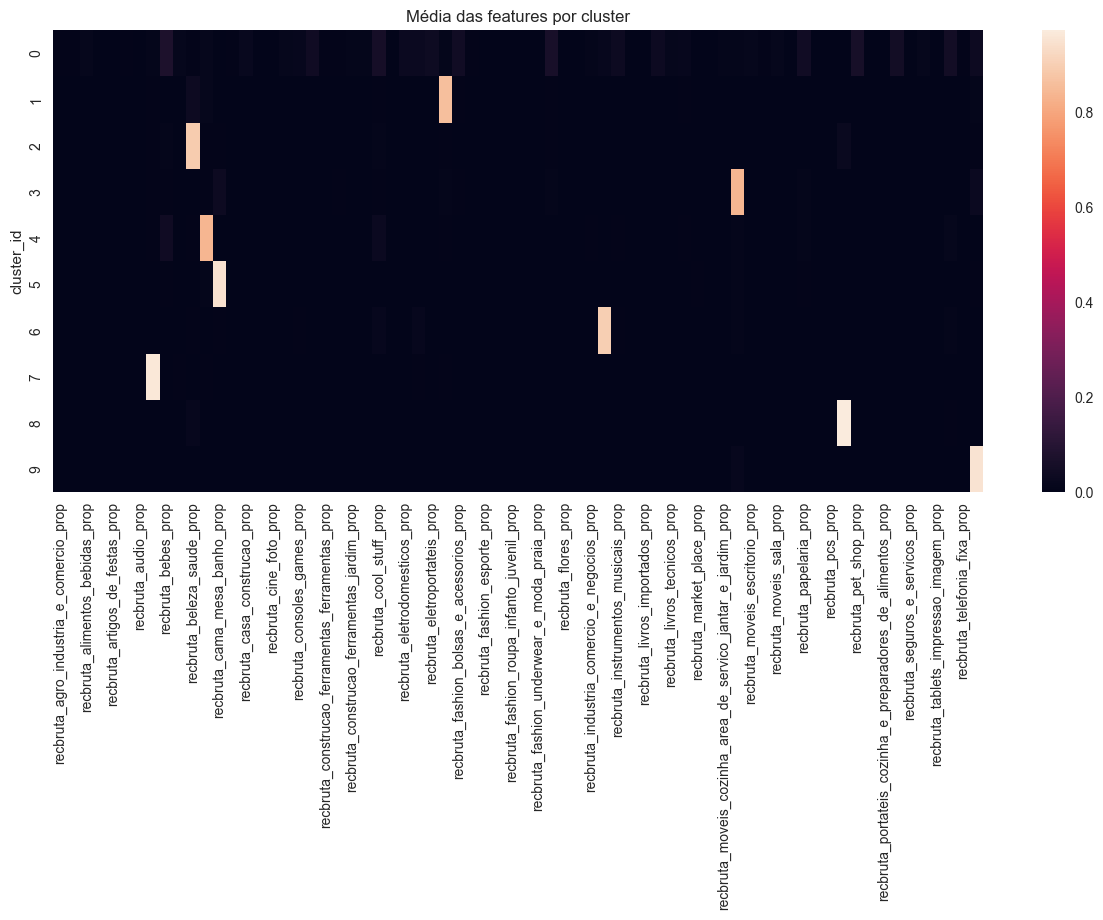

In [27]:
# Gráfico para mostrar as categorias com maior proporção média (força) dentro de cada cluster
plt.figure(figsize=(15,6))
sns.heatmap(df_cluster_mean)
plt.title('Média das features por cluster')
plt.show()

## Árvore de Devisão

In [28]:
print(f"X: {type(df_train[features])}")
print(f"y: {type(df_train['cluster_id'])}")
print(f"Qtd Colunas: {len(df_train[features].columns)}")

X: <class 'pandas.core.frame.DataFrame'>
y: <class 'pandas.core.series.Series'>
Qtd Colunas: 70


In [29]:
# Como não temos clareza de quais categorias são mais importantes dentro de cada cluster, optamos por aplicar uma árvore de decisão
# Isso vai possibilitar entendermos quais features são mais importantes dentro de cada cluster

# Usando árvore de decisão para entender quais features são mais importantes na clusterização
X = df_train[features]
y = df_train['cluster_id']

clf = tree.DecisionTreeClassifier(random_state=42)
clf.fit(X, y)

,criterion,'gini'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,42
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [30]:
clf.feature_importances_

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.00181487, 0.1017544 , 0.00161588, 0.        ,
       0.15571621, 0.07800214, 0.10358556, 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.00345677, 0.        ,
       0.        , 0.        , 0.00161588, 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.15608423,
       0.00177679, 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.1017504 , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.00179371, 0.10918598, 0.        , 0.        , 0.00090893,
       0.        , 0.00373962, 0.        , 0.        , 0.06821208,
       0.00178223, 0.        , 0.        , 0.0014543 , 0.        ,
       0.        , 0.        , 0.00179486, 0.        , 0.10395517])

In [31]:
feature_importance = pd.Series(clf.feature_importances_, index=features) # Pega a importancia das variáveis e ordena
feature_importance = feature_importance.sort_values(ascending=False)
feature_importance

recbruta_esporte_lazer_prop                     0.156084
recbruta_beleza_saude_prop                      0.155716
recbruta_moveis_decoracao_prop                  0.109186
recbruta_utilidades_domesticas_prop             0.103955
recbruta_cama_mesa_banho_prop                   0.103586
                                                  ...   
recbruta_fashion_roupa_infanto_juvenil_prop     0.000000
recbruta_alimentos_prop                         0.000000
recbruta_fashion_underwear_e_moda_praia_prop    0.000000
recbruta_ferramentas_jardim_prop                0.000000
recbruta_fashion_roupa_masculina_prop           0.000000
Length: 70, dtype: float64

In [32]:
# seleciona as 10 features mais importantes
top_features = feature_importance.index[:10].tolist()

df_cluster_mean = (
    df_train
    .groupby('cluster_id')
    .agg({col: 'mean' for col in top_features})
)

df_cluster_mean

,recbruta_esporte_lazer_prop,recbruta_beleza_saude_prop,recbruta_moveis_decoracao_prop,recbruta_utilidades_domesticas_prop,recbruta_cama_mesa_banho_prop,recbruta_automotivo_prop,recbruta_informatica_acessorios_prop,recbruta_brinquedos_prop,recbruta_perfumaria_prop,recbruta_papelaria_prop
cluster_id,,,,,,,,,,
0,0.009871,0.006727,0.009627,0.033960,0.002600,0.009022,0.015263,0.014765,0.003431,0.042868
1,0.862698,0.030570,0.003390,0.009687,0.002504,0.007445,0.001886,0.013152,0.003797,0.002548
2,0.004605,0.891791,0.003343,0.005818,0.006017,0.004213,0.000325,0.004179,0.026551,0.000633
3,0.008719,0.002150,0.840715,0.030301,0.032673,0.006039,0.003086,0.005435,0.001123,0.010799
4,0.003980,0.004046,0.010892,0.003265,0.001430,0.005104,0.000000,0.839288,0.000000,0.009838
5,0.002418,0.000822,0.008799,0.005032,0.951099,0.000527,0.000000,0.008598,0.001019,0.003984
6,0.003000,0.005834,0.008228,0.000921,0.004376,0.002701,0.900071,0.000000,0.000778,0.000120
7,0.004494,0.000409,0.000000,0.001968,0.000000,0.964155,0.002604,0.004117,0.000000,0.000000
8,0.000000,0.018795,0.000000,0.000636,0.000000,0.000000,0.000000,0.000000,0.974011,0.000000


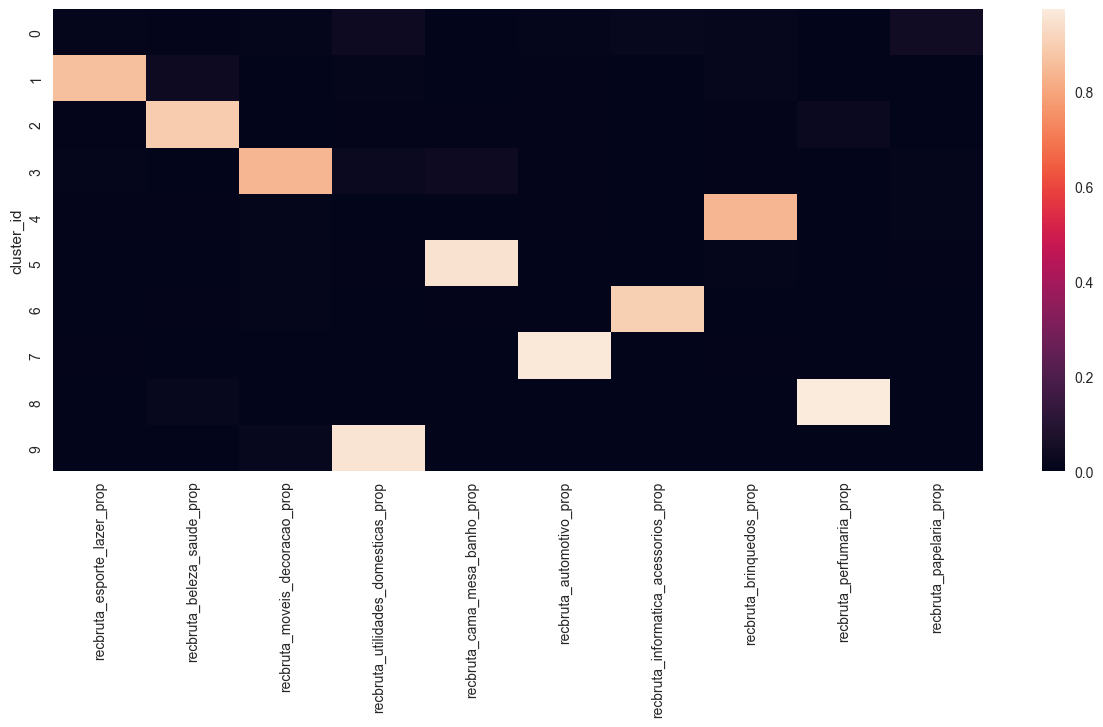

In [34]:
plt.figure(figsize=(15,6))
sns.heatmap(df_cluster_mean)
plt.show()

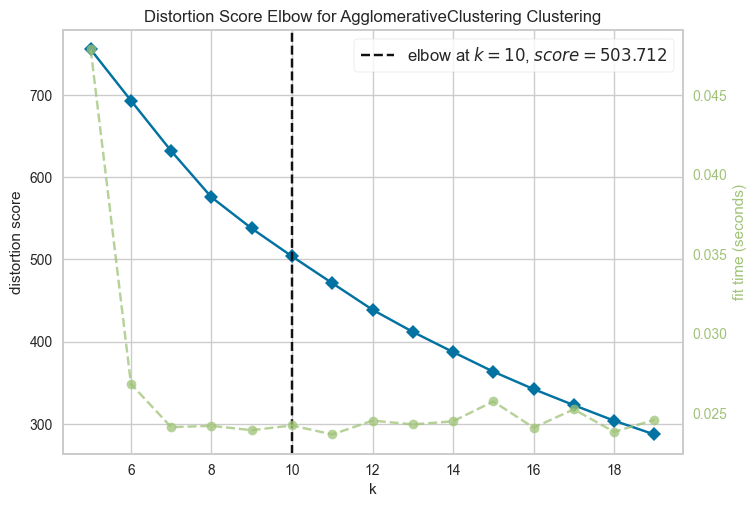

<Axes: title={'center': 'Distortion Score Elbow for AgglomerativeClustering Clustering'}, xlabel='k', ylabel='distortion score'>

In [35]:
model = cluster.AgglomerativeClustering()
visualizer = KElbowVisualizer(model, k=(5,20))
visualizer.fit(df_train[features])
visualizer.show()

# Conclusões

* Como temos muitas categorias nesta clusterização, o que dificulta o entendimento de quais categorias são mais representativas em cada cluster, ou seja, é difícil identificar qual a categoria predominante dentro de cada grupo. Por isso, optamos por rodar uma árvore de decisão para identificar quais features possuem maior importância dentro do dataset de treino.